# Predicting Heart Disease with Machine Learning
**Created By:** Reese Oliver <br>
**Date:** September 4 2024 <br>

# Introduction

The World Health Organization (WHO) estimates that **17.9 million people die** from Cardiovascular Diseases (CVDs) every year.

There are multiple risk factors that could contribute to Cardiovascular Disease in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help save many lives.

We are working for an R&D company that focuses on providing healthcare solutions. The company has collected ananymous data from multiple hospitals on roughly 1000 patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future.

**Special Comments:** [This dataset (click here)](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) was created by combining different datasets already available independently but not combined before. In this dataset, 5 datasets are combined over 11 common features which makes it the largest publicly available dataset for heart-disease research purposes.

# The Dataset

The dataset has the following features:

* `Age`: age of the patient [years]
* `Sex`: sex of the patient [M: Male, F: Female]
* `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* `RestingBP`: resting blood pressure [mm Hg]
* `Cholesterol`: serum cholesterol [mm/dl]
* `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
* `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
* `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
* `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* `HeartDisease`: output class [1: heart disease, 0: Normal]

# Technical Columns Explained

* **ChestPainType**: This column describes the type of chest pain the patient is experiencing. There are four types:
    **TA**: Typical Angina - This is the most common type of chest pain, often felt in the center of the chest and may radiate to the arms, back, or jaw.
    **ATA**: Atypical Angina - This type of chest pain is less common and may not be felt in the center of the chest.
    **NAP**: Non-Anginal Pain - This type of chest pain is not related to angina.
    **ASY**: Asymptomatic - The patient does not have any chest pain symptoms.

* **RestingBP**: This column shows the patient's blood pressure when they are at rest, measured in millimeters of mercury (mm Hg). Blood pressure is an important indicator of heart health.

* **Cholesterol**: This column shows the patient's cholesterol level, measured in milligrams per deciliter (mg/dl). High cholesterol levels can increase the risk of heart disease.

* **FastingBS**: This column indicates whether the patient's fasting blood sugar level is higher than 120 mg/dl. If it is, the value is 1, otherwise it's 0. Fasting blood sugar levels can indicate whether a patient has diabetes or is at risk of developing it.

* **RestingECG**: This column shows the results of an electrocardiogram (ECG) test, which measures the heart's electrical activity. There are three possible results: * Normal: The ECG test results are normal. * ST: The test results show abnormality in the ST segment, which may indicate heart problems. * LVH: The test results show signs of left ventricular hypertrophy, which means the heart's left ventricle is enlarged.

* **MaxHR**: This column shows the patient's maximum heart rate achieved during an exercise test, measured in beats per minute (bpm). A maximum heart rate can indicate how well the heart is functioning.

* **ExerciseAngina**: This column tells us whether the patient experienced chest pain (angina) during an exercise test.

* **Oldpeak**: This column shows the degree of ST depression, which is a measure of how much the heart's ST segment is depressed during an exercise test. The value is a numeric measurement of this depression.

* **ST_Slope**: This column describes the slope of the peak exercise ST segment, which is a part of the electrocardiogram (ECG) test.

  There are three possible slopes:
  
  * **Up**: The ST segment is upsloping, which means it's rising. This slope is generally considered healthy for someone undergoing an exercise test.
  * **Flat**: The ST segment is flat, which means it's not rising or falling. This slope can indicate myocardial ischemia.
  * **Down**: The ST segment is downsloping, which means it's falling. This slope is often associated with myocardial ischemia or infarction.
 
The ST segment is like a brief "rest" period between beats. It's the time when your heart is not squeezing or pumping blood, but rather recovering from the previous beat. Think of it like a quick pause between heartbeats.

<br>* **HeartDisease**: This column is the output class, which indicates whether the patient has heart disease or not. The values are: * 1: The patient has heart disease. * 0: The patient does not have heart disease (i.e., they are normal).

# Part 1: Cleaning the Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# read in the dataset. split the data into a training and validation dataset

hd = pd.read_csv('patient_data.csv')

In [11]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
hd.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
duplicates = hd[hd.duplicated()]

In [14]:
duplicates

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [15]:
hd.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Findings

Thankfully the dataset does not contain duplicate values. As for the datatypes, it appears that each column has the correct datatype already. Finally, there are no date columns that we need to parse.

From using `DataFrame.describe()` we can tell the average age is 53.51. 

The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.

# Investigating Further

In [19]:
# identify missing (null) values in the dataset
missing_values = hd.isnull().sum()
print(missing_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## Investigating the Distribution of the Data

To better understand how the data is distributed in this dataset, we'll create some visualizations for specific columns of the dataset.

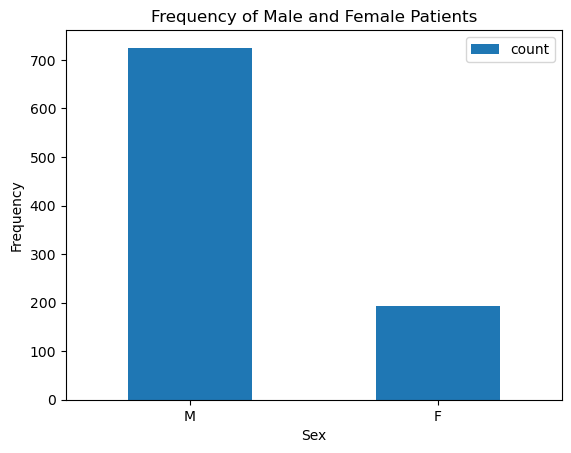

In [21]:
hd['Sex'].value_counts().plot.bar(rot=0)
plt.ylabel('Frequency')
plt.title('Frequency of Male and Female Patients')
plt.legend()
plt.show()

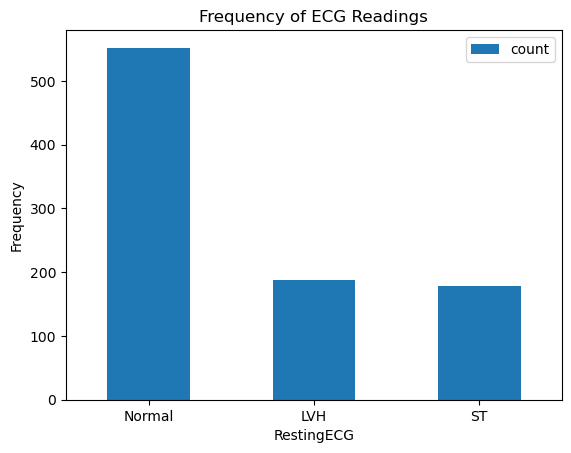

In [22]:
hd['RestingECG'].value_counts().plot.bar(rot=0)
plt.ylabel('Frequency')
plt.title('Frequency of ECG Readings')
plt.legend()
plt.show()

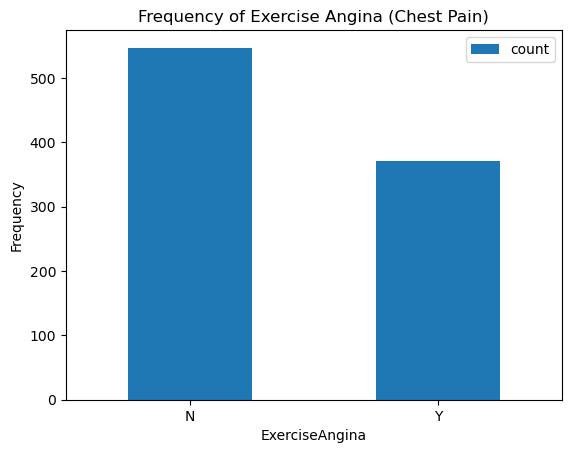

In [23]:
hd['ExerciseAngina'].value_counts().plot.bar(rot=0)
plt.ylabel('Frequency')
plt.title('Frequency of Exercise Angina (Chest Pain)')
plt.legend()
plt.show()

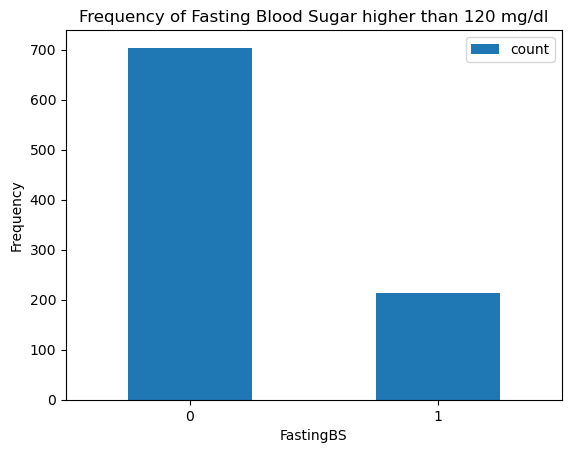

In [24]:
hd['FastingBS'].value_counts().plot.bar(rot=0)
plt.ylabel('Frequency')
plt.title('Frequency of Fasting Blood Sugar higher than 120 mg/dl')
plt.legend()
plt.show()

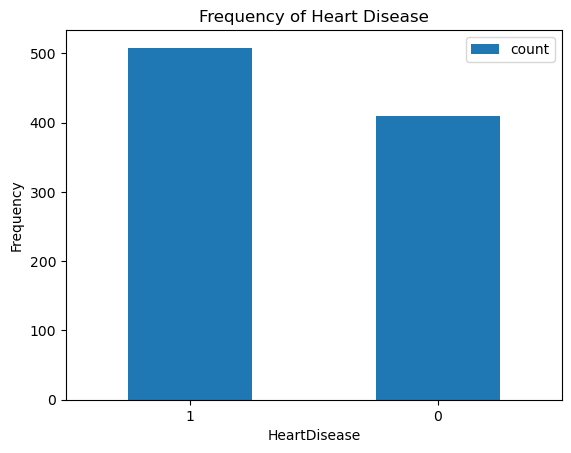

In [25]:
hd['HeartDisease'].value_counts().plot.bar(rot=0)
plt.ylabel('Frequency')
plt.title('Frequency of Heart Disease')
plt.legend()
plt.show()

In [26]:
# Find the percentage of patients that have heart disease, are male, and are over 50 years old

mask = (hd['Age'] >= 50) & (hd['HeartDisease'] == 1) & (hd['Sex'] == 'M')
diseased_males_over_50 = hd[mask]
proportion = len(diseased_males_over_50) / len(hd)
percentage = int(round(proportion, 2) * 100)
print(f"{percentage}% of the dataset contains patients that are male, over 50, and have heart disease")

39% of the dataset contains patients that are male, over 50, and have heart disease


In [27]:
# Find the median age of patients diagnosed with heart disease

mask2 = hd['HeartDisease'] == 1
hd_patients = hd[mask2]
print("The median age of patients with heart disease is", hd_patients['Age'].median())

The median age of patients with heart disease is 57.0


In [28]:
hd_patients.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


In [29]:
hd[hd['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [30]:
hd[hd['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [31]:
def fix_cholesterol(value):
    if value == 0:
        return hd['Cholesterol'].median()
    else:
        return value

hd['Cholesterol'] = hd['Cholesterol'].apply(fix_cholesterol)

In [32]:
hd['Cholesterol'].describe()

count    918.000000
mean     240.581699
std       53.982967
min       85.000000
25%      214.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [33]:
hd = hd.drop(index=449)

At this stage, we've fixed the cholesterol column, so now the missing values have been filled with the median cholesterol value. We may have gotten better results from using a logistic regression model, but we're going to save the machine learning tasks for later.

We've also removed a column that was missing a blood pressure reading.

Next, we'll analyze the correlations between HeartDisease and various health indicators.

# Part 2: Analyzing Correlations

When attempting to analyze correlations between two variables, if one of the variables contains binary values (0 or 1), then the best type of graph is either a boxplot or a violin plot.

This allows you to analyze the distribution and frequency of data for both variables and make inferences.

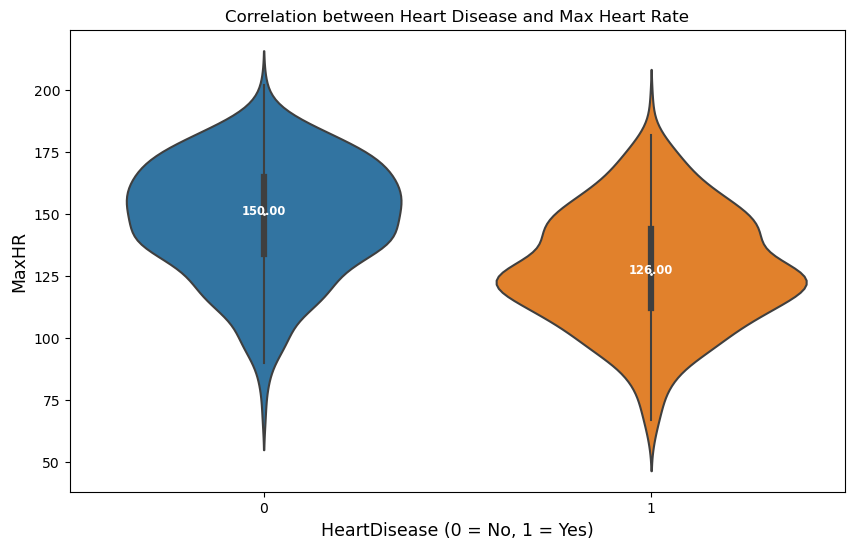

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('patient_data.csv')

medians = df.groupby('HeartDisease')['MaxHR'].median()

plt.figure(figsize=(10,6))
sns.violinplot(x='HeartDisease', y='MaxHR', data=df)

for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', size='small', color='white', weight='semibold')

plt.title('Correlation between Heart Disease and Max Heart Rate')
plt.ylabel('MaxHR',fontsize=12.5)
plt.xlabel('HeartDisease (0 = No, 1 = Yes)',fontsize=12.5)
plt.show()

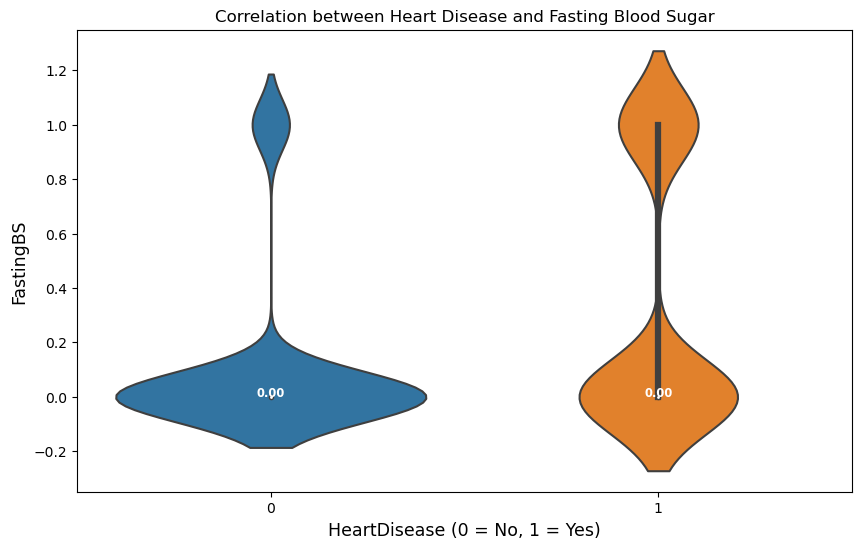

In [38]:
df = pd.read_csv('patient_data.csv')


plt.figure(figsize=(10,6))
sns.violinplot(x='HeartDisease', y='FastingBS', data=df)

medians = df.groupby('HeartDisease')['FastingBS'].median()

for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', size='small', color='white', weight='semibold')

plt.title('Correlation between Heart Disease and Fasting Blood Sugar')
plt.xlabel('HeartDisease (0 = No, 1 = Yes)',fontsize=12.5)
plt.ylabel('FastingBS',fontsize=12.5)
plt.show()

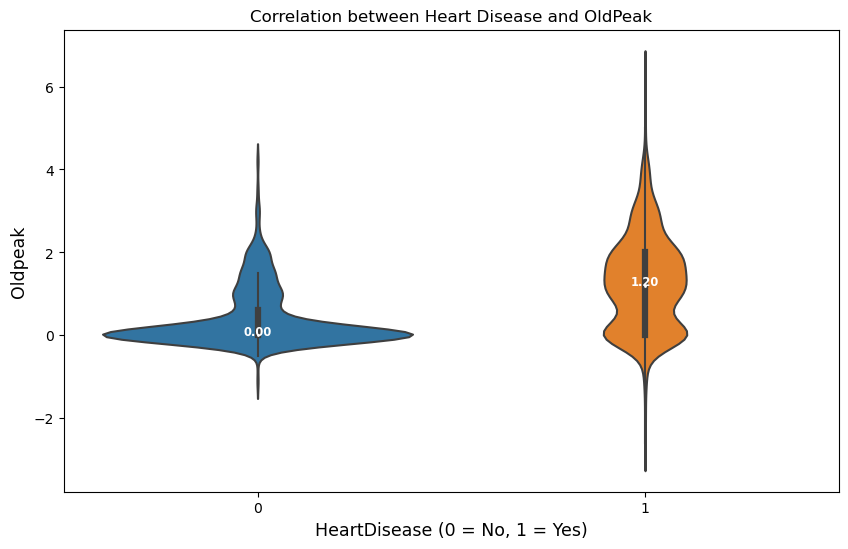

In [39]:
medians = df.groupby('HeartDisease')['Oldpeak'].median()

df = pd.read_csv('patient_data.csv')

plt.figure(figsize=(10,6))
sns.violinplot(x='HeartDisease', y='Oldpeak', data=df)

for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', size='small', color='white', weight='semibold')

plt.title('Correlation between Heart Disease and OldPeak')
plt.ylabel('Oldpeak',fontsize=12.5)
plt.xlabel('HeartDisease (0 = No, 1 = Yes)',fontsize=12.5)
plt.show()

# Part 2: Creating Dummy Variables

Now that we've cleaned our data, we can select features for our model. Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:

* Age
* Sex
* ChestPainType
* Cholesterol
* FastingBS


We'll also explore how the columns correlate to one another. Before we attempt that, we'll convert our categorical columns into dummy variables.

In [108]:
hd

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [42]:
dummy_df = pd.get_dummies(hd, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [43]:
dummy_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180.0,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283.0,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214.0,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195.0,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193.0,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131.0,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236.0,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [44]:
corr_matrix = dummy_df.corr()
corr_matrix = corr_matrix[(corr_matrix >= 0.25)|(corr_matrix <= -0.25)]

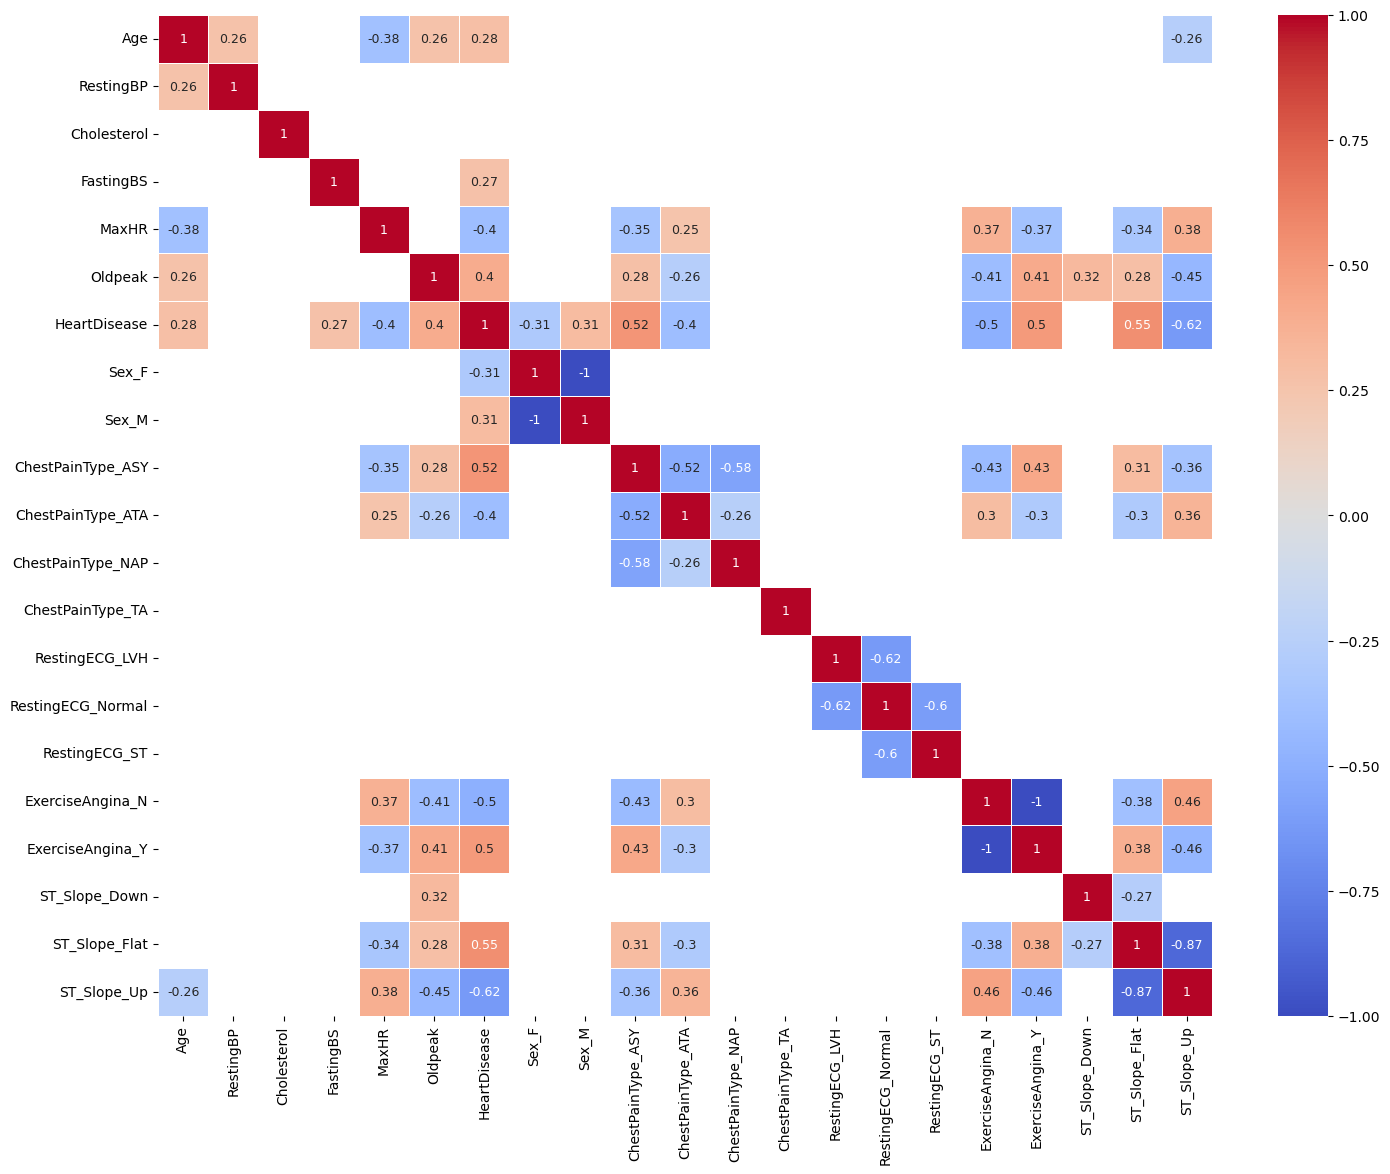

In [45]:
plt.figure(figsize=(17,13))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 9}, cmap='coolwarm', linewidths=0.5)
plt.show()

Looking at the `HeartDisease` row, the variables with correlations greater than or equal to 0.4 are:

* MaxHR: 0.4
* Oldpeak: 0.4
* ChestPainType_ASY: 0.52
* ChestPainType_ATA: 0.4
* ExerciseAngina_Y: 0.5
* ExerciseAngina_N: 0.5
* ST_Slope_Flat: 0.55
* ST_Slope_Up: 0.62

Text(0, 0.5, 'ST Slope Up')

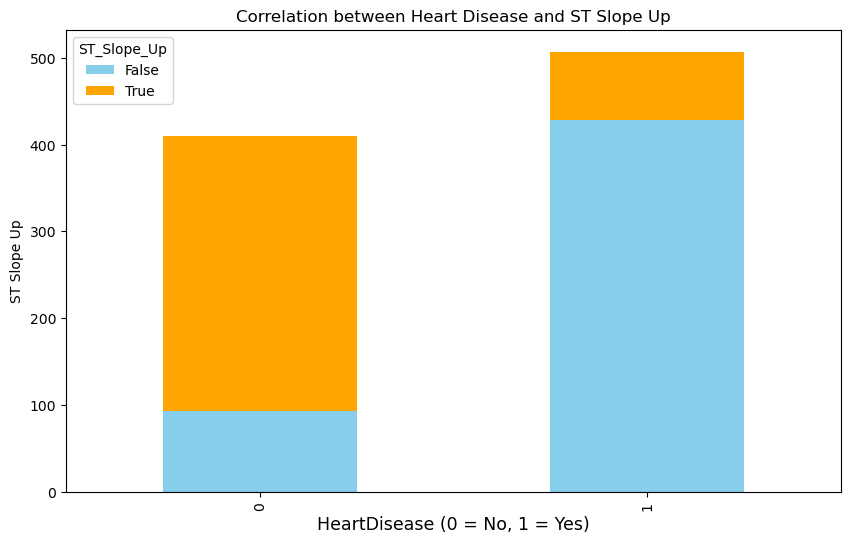

In [47]:
contingency_table = pd.crosstab(dummy_df['HeartDisease'],dummy_df['ST_Slope_Up'])

contingency_table.plot(kind='bar',stacked=True, figsize=(10,6), color=['skyblue','orange']) 

plt.title('Correlation between Heart Disease and ST Slope Up')
plt.xlabel('HeartDisease (0 = No, 1 = Yes)',fontsize=12.5)
plt.ylabel('ST Slope Up')

Text(0, 0.5, 'ST Slope Flat')

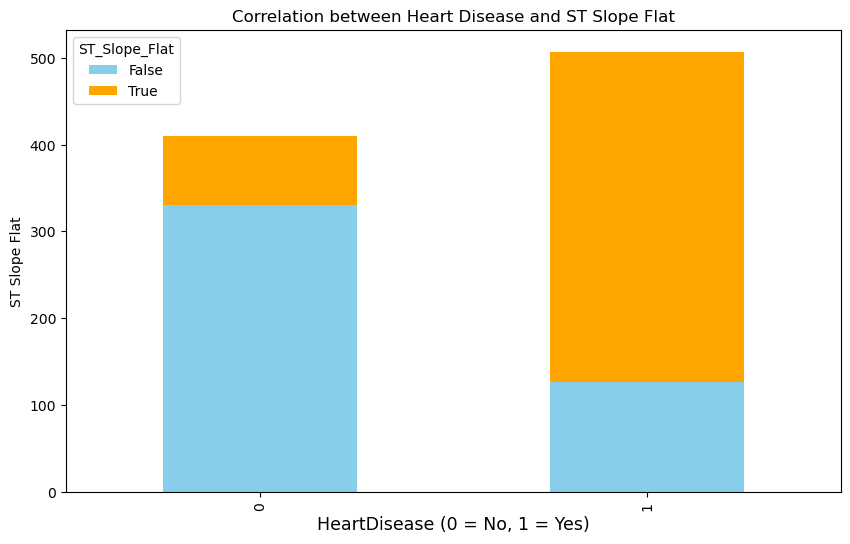

In [48]:
contingency_table = pd.crosstab(dummy_df['HeartDisease'],dummy_df['ST_Slope_Flat'])

contingency_table.plot(kind='bar',stacked=True, figsize=(10,6), color=['skyblue','orange']) 

plt.title('Correlation between Heart Disease and ST Slope Flat')
plt.xlabel('HeartDisease (0 = No, 1 = Yes)',fontsize=12.5)
plt.ylabel('ST Slope Flat')

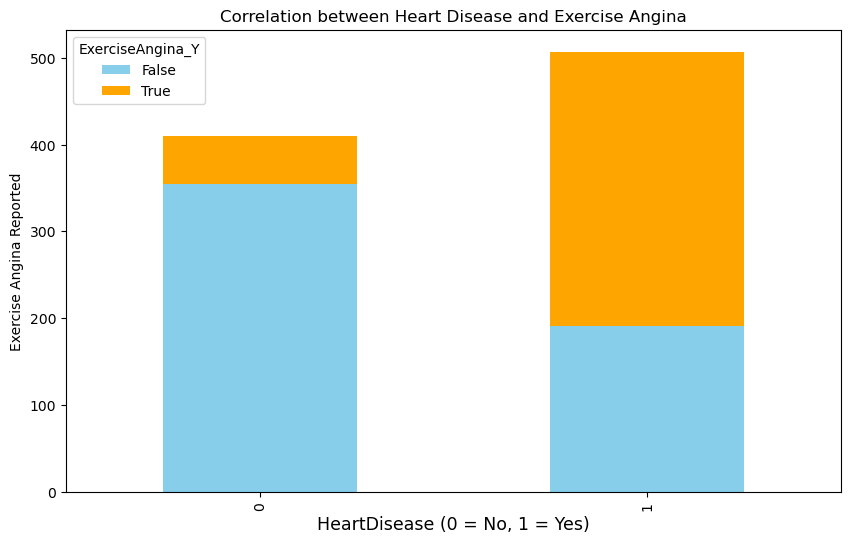

In [49]:
contingency_table = pd.crosstab(dummy_df['HeartDisease'],dummy_df['ExerciseAngina_Y'])

contingency_table.plot(kind='bar',stacked=True, figsize=(10,6), color=['skyblue','orange']) 

plt.title('Correlation between Heart Disease and Exercise Angina')
plt.xlabel('HeartDisease (0 = No, 1 = Yes)',fontsize=12.5)
plt.ylabel('Exercise Angina Reported')
plt.show()

# Strongest Correlations Explained:


1. **Heart Disease and a Flat ST Slope** <br>

A Flat ST Slope is commonly associated with myocardial ischemia or heart disease. In electrocardiography (ECG), a Flat ST Slope can be an indication of abnormal cardiac function, such as:

* Myocardial ischemia: Reduced blood flow to the heart muscle, which can lead to chest pain or angina.
* Heart disease: A Flat ST Slope can be a sign of coronary artery disease, cardiomyopathy, or other cardiac conditions.

2. **Heart Disease and an Up ST Slope**

An Up ST Slope is commonly associated with a normal or healthy heart. In electrocardiography (ECG), an Up ST Slope is often seen in individuals with normal cardiac function This suggests that an Up ST Slope might be a protective factor or a indicator of better heart health. 

3. **Heart Disease and Exercise Angina** <br>
Patients who experience angina (chest pain) during exercise are more likely to have heart disease, and vice versa. However, this association is not extremely strong, indicating that exercise-induced angina is not a definitive predictor of heart disease.

4. **Heart Disease & Maximum Heart Rate** <br>

From the heatmap, we can see that the higher a patient's MaxHR, the lower their risk of Heart Disease. This negative correlation means that as MaxHR goes up, HeartDisease goes down, and vice versa. As MaxHR goes down, HeartDisease risk goes up. 

Maximum heart rate (MaxHR) is the highest number of heartbeats per minute (bpm) that an individual's heart can achieve during intense exercise, typically measured during a maximal exercise test. In other words, individuals with a higher maximum heart rate during exercise tend to have a lower risk of heart disease. This makes sense, as a higher maximum heart rate can be an indicator of better cardiovascular health and fitness.

5. **Heart Disease and Oldpeak** <br>

OldPeak refers to the ST depression induced by exercise relative to rest. The ST segment is a part of the ECG that corresponds to the period when the heart muscle is recovering from a heartbeat. A higher ST depression value indicates a higher risk of heart disease.

6. **Heart Disease and Fasting Blood Sugar** <br>
Research has shown that there is a strong correlation between high fasting blood sugar levels and an increased risk of heart disease. 

* Insulin resistance: When you have high fasting blood sugar, your body becomes less responsive to insulin, making it harder for glucose to enter your cells. This leads to insulin resistance, a precursor to type 2 diabetes.
  
* Inflammation: High blood sugar levels can cause chronic inflammation in the body, which can damage blood vessels and increase the risk of heart disease.
  
* Oxidative stress: High blood sugar can lead to oxidative stress, which can damage cells and increase the risk of heart disease.
Blood vessel damage: High blood sugar can damage blood vessels, making them more susceptible to plaque buildup and increasing the risk of heart disease.

# Part 3: The Machine Learning Phase
## Building a Separate Classifier for Each Variable

From our correlation heatmap, we can identify the following variables to be strongly correlated to Heart Disease:

* **MaxHR**: 0.4
* **Oldpeak**: 0.4
* **ChestPainType_ASY**: 0.52
* **ChestPainType_ATA**: 0.4
* **ExerciseAngina_Y**: 0.5
* **ST_Slope_Flat**: 0.55
* **ST_Slope_Up**: 0.62

Surprisingly, Cholesterol is not strongly correlated to HeartDisease. We can consider ignoring the feature for now.

Next, we will create and train multiple k-NN models using one variable at a time.

In [54]:
# Import necessary libraries from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Define the list of variables we want to use for building the classifier
feature_list = ['Age','FastingBS','MaxHR', 'Oldpeak', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ExerciseAngina_Y', 'ExerciseAngina_N', 'ST_Slope_Flat', 'ST_Slope_Up']

# Define the target variable (what we're trying to predict)
target = 'HeartDisease'

# Create empty lists to store the classifiers and test data
classifiers = []
X_tests = []
y_tests = []

# Loop through each feature in the feature list
for feature in feature_list:
    
    # Select only the current feature for this iteration from the dataframe
    X = dummy_df[[feature]]
    # Select the target variable from the dataframe
    y = dummy_df[target]
    
    # Split the data into training and testing sets (80% for training, 20% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a K-Nearest Neighbors classifier with 10 neighbors
    knn = KNeighborsClassifier(n_neighbors=10)
    
    # Train the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Append the trained classifier to the list of classifiers
    classifiers.append(knn)
    
    # Append the test data to the lists of test data
    X_tests.append(X_test)
    y_tests.append(y_test)

In [55]:
from sklearn.metrics import accuracy_score

# Loop through each classifier in our list of classifiers
for i, classifier in enumerate(classifiers):
    
    # Get the corresponding test data for this classifier
    X_test = X_tests[i]
    y_test = y_tests[i]
    
    # Use the classifier to make predictions on the health indicators contained in X_test
    y_pred = classifier.predict(X_test)

    # Use accuracy_score to check the accuracy of the predictions against the diagnoses contained in y_test
    accuracy = accuracy_score(y_test, y_pred)
  
    # Print the results for this feature
    print(f"Feature: {feature_list[i]}")
    print(f"Accuracy: {accuracy:.3f}")
    print("")  # empty line for readability

Feature: Age
Accuracy: 0.587

Feature: FastingBS
Accuracy: 0.565

Feature: MaxHR
Accuracy: 0.701

Feature: Oldpeak
Accuracy: 0.652

Feature: ChestPainType_ASY
Accuracy: 0.750

Feature: ChestPainType_ATA
Accuracy: 0.712

Feature: ExerciseAngina_Y
Accuracy: 0.674

Feature: ExerciseAngina_N
Accuracy: 0.674

Feature: ST_Slope_Flat
Accuracy: 0.761

Feature: ST_Slope_Up
Accuracy: 0.788



We got the highest accuracy with `ST_Slope_Up` as our feature. But what if we trained a model on all of these features together?

Let's try that next!

Before we do, it's important to note that our features are not yet normalized. Not all of the values are within the same range. We will first scale our data to the range (0, 1) before training our model. Note: We will only scale our selected features.

# Building a Single Classifier Based On All Variables

**Now, let's scale the features using MinMaxScaler:**

In [59]:
# Dataframe with the health indicators or 'features'
X = dummy_df.drop('HeartDisease', axis=1)

# Dataframe with the target variables
y = dummy_df['HeartDisease']

# Split X and y dataframes into train & test sets. 80% of each dataframe will be used for training, while 20% will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create the scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

#Transform the test features
X_test_scaled = scaler.transform(X_test)

#instantitate a classifier object which seeks 10 nearest neighbors
knn = KNeighborsClassifier(n_neighbors=10)

#fit the classifier with the features training data and target training data
knn.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score
# Make predictions on test data
predictions = knn.predict(X_test_scaled)
# Calculate accuracy of predictions vs. true labels
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

# Create a dataframe with the predicted values
predicted_df = pd.DataFrame({'Predicted': predictions})

# Add the actual values from the answer key to the dataframe
y_test.reset_index(drop=True,inplace=True)
predicted_df['Actual'] = y_test

# View the resulting dataframe
print(predicted_df.sample(5))

Model Accuracy: 0.8641304347826086
     Predicted  Actual
45           1       0
164          1       1
55           0       0
166          0       1
56           0       0


In [60]:
# Reset the index of the test set to ensure proper alignment
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Create a results dataframe that combines the test features, predicted values, and actual values
results_df = pd.concat([X_test, pd.DataFrame({'Predicted': predictions}), pd.DataFrame({'HeartDisease': y_test})], axis=1)

# Add a column to the results dataframe to indicate whether each prediction was correct or not
results_df['Correctness'] = results_df.apply(lambda row: 'Correct' if row['Predicted'] == row['HeartDisease'] else 'Incorrect', axis=1)

# Display a random sample of 5 rows from the results dataframe
results_df.sample(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Predicted,HeartDisease,Correctness
71,48,110,211.0,0,138,0.0,False,True,False,False,...,True,False,True,False,False,False,True,0,0,Correct
97,74,138,223.0,0,116,0.2,False,True,False,False,...,True,False,True,False,False,False,True,0,0,Correct
173,52,130,180.0,0,140,1.5,True,False,True,False,...,True,False,False,True,False,True,False,1,0,Incorrect
179,50,140,288.0,0,140,0.0,True,False,False,False,...,True,False,False,True,False,True,False,0,1,Incorrect
177,67,100,299.0,0,125,0.9,False,True,True,False,...,False,False,False,True,False,True,False,1,1,Correct


# Tuning the k-NN Model with GridSearchCV

Our previous model with all of our selected and normalized features got an accuracy of ~86%! That's not a strong improvement on the model trained on just the ST_Slope_Flat feature, but it's a good start.

Now that we have a reasonably well-performing model, we can experiment with the parameters and hyperparameters. We'll use **GridSearchCV** to search over those values.

The purpose of using GridSearchCV with your K-Nearest Neighbors (KNN) classifier is to perform **hyperparameter tuning.**

In the context of your KNN classifier, hyperparameters are parameters that are set before training the model, such as the number of nearest neighbors (n_neighbors) or the distance metric used (metric). The goal of hyperparameter tuning is to find the optimal combination of these hyperparameters that results in the best performance of your model.

**GridSearchCV** is a handy tool that allows you to perform this hyperparameter tuning in an efficient way. It works by performing a grid search over a specified set of hyperparameters, training and evaluating your model for each combination, and returning the best-performing combination.

By using GridSearchCV with your KNN classifier, you can:

Try out different hyperparameter combinations to see which one works best for your dataset
Avoid manually trying out different hyperparameters and evaluating the model performance for each one
Get a more accurate estimate of your model's performance by using techniques like cross-validation

In [63]:
# split the dataset into training and test sets

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

splits = [x_train,x_test,y_train,y_test]

#create the scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scale the features since the values exist in different ranges
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

# fit the training sets to the classifier
knn.fit(x_train_scaled,y_train)

# import GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(x_train_scaled, y_train)

print("Best score: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

Best score:  0.8607399124033176
Best parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 25, 'p': 2, 'weights': 'uniform'}


According to the Grid Search, the best parameters are as follows:

**{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 25, 'p': 2, 'weights': 'uniform'}**

This is very similar to the accuracy that I obtained my manually tuning the parameters myself, however, I could have saved myself a lot of time and guesswork by simply relying on the GridSearchCV tool.

# Evluate GridSearchCV's Performance on Test Set

Now that we've found the best hyperparameters for our model using GridSearchCV, we can evaluate its performance on our test set.

To do this, we can use the best_estimator_ attribute of the GridSearchCV object, which returns the estimator with the best found parameters. We can then use this estimator to make predictions on our test set and evaluate its performance.

Here's how you can do it:

In [67]:
# Get the best estimator
best_knn = grid_search.best_estimator_

# Make predictions on the test set features
y_pred = best_knn.predict(x_test_scaled)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.875


# Conclusion

GridSearchCV's `best_estimator_` returned an accuracy score of 87.5%, which is phenomenal. We could probably get an even higher accuracy score if we had a dataset where the male and female population is evenly distributed, however, our dataset is skewed towards males. Since being male is correlated with a higher risk of heart disease, that skews our k-NN model a bit. Nonetheless, the model is still able to make very intelligent predictions despite the fact that the dataset is not perfect, which highlights the power of Machine Learning Algorithms.

## Does Machine Learning Belong in HealthCare?

I believe there is a very important place for machine learning in HealthCare. While we can study data visualizations to see correlations between health indicators and heart disease, machine learning models can speed up the process tremendously, while GridSearchCV can tune the model to the virtually the same level of accuracy that we humans can manually tune the model.

These powerful tools can allow us to classify whether or not someone has heart disease with very high accuracy. If we want to obtain an even greater level of accuracy, then we could implement a random forest classifier, which is more advanced than the k-NN model, but also more accurate.

## Special Acknowledgements

**Data Sources:** 1: Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2: University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3: University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4: V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. <br>

**Dataset Composition:** <br>
Cleveland: 303 observations <br>
Hungarian: 294 observations <br>
Switzerland: 123 observations <br>
Long Beach VA: 200 observations <br>
Stalog (Heart) Data Set: 270 observations <br>

**Special Comments:** [This dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) was created by combining different datasets already available independently but not combined before. In this dataset, 5 datasets are combined over 11 common features which makes it the largest publicly available dataset for heart-disease research purposes.